<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Exam_question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss, lqr, ctrb, obsv
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 3.1 MB/s eta 0:00:00


In [2]:
# Define your plant:
A = np.array([[0, 1],[-7, -9]])
B = np.array([[0],[1]])
C = np.array([4, 1])
D = np.array([0])

sys = ss(A,B,C,D)
print(sys)
print(tf(sys))

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-7. -9.]]

B = [[0.]
     [1.]]

C = [[4. 1.]]

D = [[0.]]

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    s + 4
-------------
s^2 + 9 s + 7



In [3]:
Cm = ctrb(A, B)
print(Cm)
print("rank: ", np.linalg.matrix_rank(Cm))

Om = obsv(A, C)
print(Om)
print("rank: ", np.linalg.matrix_rank(Om))

[[ 0.  1.]
 [ 1. -9.]]
rank:  2
[[ 4.  1.]
 [-7. -5.]]
rank:  2


LQR weights: (array([[0.07106781, 0.06322987]]), array([[1.08671298, 0.07106781],
       [0.07106781, 0.06322987]]), array([-0.86221906, -8.20101081]))
5001
(2, 5001)


<ipython-input-9-bde17178dc90>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplt[i] = y
<ipython-input-9-bde17178dc90>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yesplt[i] = yes


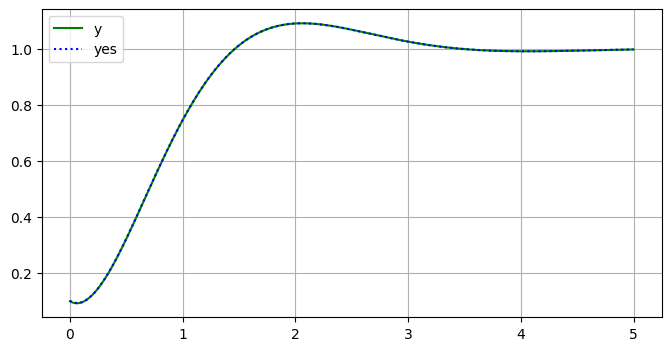

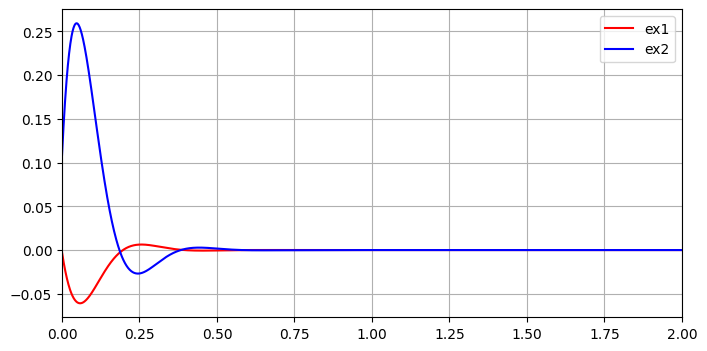

In [9]:
#K = np.array([-3.21, -6.7])      # state feedback
K = np.array([2.21, -2.7])      # state feedback plus integral control
ke = 3.79

Q = np.array([[1, 0],
              [0, 1]])  # State cost weighting

R = np.array([1])    # Control effort cost weighting

K_lqr = lqr(A, B, Q, R)
print("LQR weights:", K_lqr)

L = np.array([[24.31],[-83.21]])

x = np.array([[0],[0.1]])#np.zeros((A.shape[0], 1))
xes = x
ex = x
yes = 0
u = 0
r = 1
esum = 0

# simulate
t0 = 0
t1 = 5
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)


#print(x.reshape(-1,1))
print(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])
yesplt = np.zeros(t.shape[0])
explt = np.zeros((A.shape[0], t.shape[0]))
print(explt.shape)

for i in range(t.shape[0]):
  # model
  xdot = A @ x + B * u
  x = x + xdot * dt
  y = C @ x + D * u

  # observer
  xesdot = np.dot(A, xes) + B * u + L * (y-yes)
  xes = xes + xesdot * dt
  yes = np.dot(C,xes)+ D * u

  #u = r - K @ x
  e = r - y
  esum = esum + e * dt
  u = ke * esum - K @ xes

  #state error
  exdot = np.dot(A-L*C, ex)
  ex = ex + exdot * dt

  yplt[i] = y
  yesplt[i] = yes
  rplt[i] = r
  explt[:,i] = ex.reshape(-1)

# plot results
plt.figure(figsize=(8, 4))
plt.plot(t, yplt, 'green')
plt.plot(t, yesplt, 'blue', linestyle=':')
#plt.ylim(0, 0.002)
plt.grid()
plt.legend(['y','yes'])
plt.show()

plt.figure(figsize=(8, 4))
#plt.plot(t, explt.T, 'r')
plt.plot(t, explt[0,:], 'r')
plt.plot(t, explt[1,:], 'b')
#plt.ylim(-10**-3, 10**-3)
plt.xlim(0, 2.0)
plt.grid()
plt.legend(['ex1','ex2','ex3'])
plt.show()


Eigenvalues (Roots) of A: [-20.+0.j          -4.+5.45893763j  -4.-5.45893763j]
Eigenvalues (Roots) of A: [-399.99366398 +0.j         -40.00316801+54.5684805j
  -40.00316801-54.5684805j]


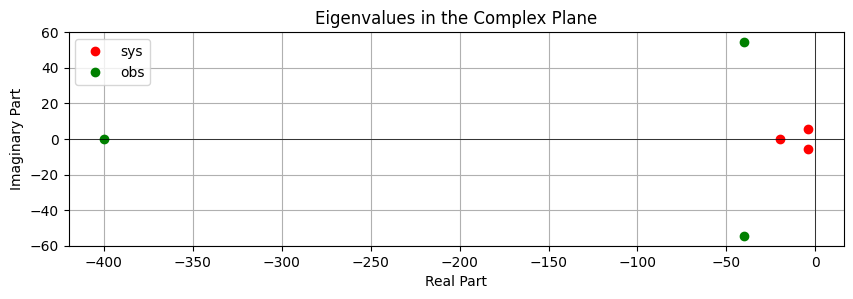

In [ ]:
# plot roots (eigenvalues) of the system matrix of controlled system and observer
sys_eigenvalues, _ = np.linalg.eig(A-np.outer(B, K))

print("Eigenvalues (Roots) of A:", sys_eigenvalues)

obs_eigenvalues, _ = np.linalg.eig(A-np.outer(L, C))

print("Eigenvalues (Roots) of A:", obs_eigenvalues)

plt.figure(figsize=(10, 6))
# Plot the real part vs. the imaginary part of the eigenvalues
plt.plot(sys_eigenvalues.real, sys_eigenvalues.imag, 'ro')  # 'ro' plots red dots
plt.plot(obs_eigenvalues.real, obs_eigenvalues.imag, 'go')  # 'ro' plots red dots

# Add grid, labels, and make sure the aspect ratio is equal
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Complex Plane')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['sys','obs'])

# Show the plot
plt.show()
